In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from xgboost.sklearn import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
from sklearn import metrics
from sklearn.model_selection import train_test_split
RANDOM_SEED = 42

d:\anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
last_dirs = ["1_android.sensor.accelerometer.data.csv.gz"]#,"4_android.sensor.gyroscope.data.csv.gz"]
path = "Sessions_new/"
dirs = []
dir_list = [x[0] for x in os.walk(path)]
for each_dir in dir_list[2:]:

    if "data" in each_dir:
    #each_file = os.listdir(each_dir)
        dirs.append(each_dir)
        


dirs.sort(key=lambda x:x[-22:])
gy_shapes = []
print(dirs[0])
#avg_acc_gy = pd.DataFrame(columns = ["avg_acc_x","avg_acc_y","avg_acc_x", "avg_gyroscope_x",  "avg_gyroscope_y",  "avg_gyroscope_z",  "label"])
for i in dirs[0:1]:
    #print(i)
    full_path_acc = os.path.normpath(i + "/" + "1_android.sensor.accelerometer.data.csv.gz")
    full_path_gy = os.path.normpath(i + "/" + "4_android.sensor.gyroscope.data.csv.gz")
    print("processing : " + full_path_acc)
    df_ac = pd.read_csv(full_path_acc, compression='gzip', sep=',', header=None)
    df_gy = pd.read_csv(full_path_gy, compression='gzip', sep=',', header=None)
    #new_df_ac = process_avg_acceleration(df_ac)
    #new_df_gy = process_avg_gyroscope(df_gy)
    #print(new_df_ac.head())
    #print(new_df_gy.head())
    #if new_df_gy.shape[0] < new_df_ac.shape[0]:
        #new_df_ac = new_df_ac[:new_df_gy.shape[0]]
    #new_df = pd.concat([new_df_ac,new_df_gy], axis = 1)
    #print(new_df.head())   
    #print(new_df.shape)
    #print(avg_acc_gy.shape)
    #gy_shapes.append(new_df.shape)
    #avg_acc_gy = new_df

for i in dirs[1:]:
    print(i)
    full_path_acc = os.path.normpath(i + "/" + "1_android.sensor.accelerometer.data.csv.gz")
    full_path_gy = os.path.normpath(i + "/" + "4_android.sensor.gyroscope.data.csv.gz")
    #if full_path_acc == "Sessions2\Sessions2\14442D57F7E1B88_Mon_Feb_12_18-26_2018_PST\data\1_android.sensor.accelerometer.data.csv.gz":
        #continue
    print("processing : " + full_path_acc)
    df_ac_new = pd.read_csv(full_path_acc, compression='gzip', sep=',', header=None)
    #print("processing : " + full_path_gy)
    #df_gy = pd.read_csv(full_path_gy, compression='gzip', sep=',', header=None)
    #new_df_ac = process_avg_acceleration(df_ac)
    #new_df_gy = process_avg_gyroscope(df_gy)
    #print(new_df_ac.head())
    #print(new_df_gy.head())
    #if new_df_gy.shape[0] < new_df_ac.shape[0]:
    #df_ac = new_df_ac[:new_df_gy.shape[0]]
    print(df_ac.shape)
    df_ac = pd.concat([df_ac,df_ac_new], axis = 0)
    #print(new_df.head())   
    #print(new_df.shape)
    #print(avg_acc_gy.shape)
    #gy_shapes.append(new_df.shape)
    #avg_acc_gy = pd.concat([avg_acc_gy,new_df])


print(df_ac.shape)

Sessions_new/14442D57F7E1B88_Tue_Mar_06_18-33_2018_PST\data
processing : Sessions_new\14442D57F7E1B88_Tue_Mar_06_18-33_2018_PST\data\1_android.sensor.accelerometer.data.csv.gz
Sessions_new/14442D57F7E1B88_Wed_Mar_07_11-53_2018_PST\data
processing : Sessions_new\14442D57F7E1B88_Wed_Mar_07_11-53_2018_PST\data\1_android.sensor.accelerometer.data.csv.gz
(75072, 6)
Sessions_new/14442D57F7E1B88_Wed_Mar_07_13-36_2018_PST\data
processing : Sessions_new\14442D57F7E1B88_Wed_Mar_07_13-36_2018_PST\data\1_android.sensor.accelerometer.data.csv.gz
(141679, 6)
Sessions_new/14442D57F7E1B88_Wed_Mar_07_13-42_2018_PST\data
processing : Sessions_new\14442D57F7E1B88_Wed_Mar_07_13-42_2018_PST\data\1_android.sensor.accelerometer.data.csv.gz
(163262, 6)
Sessions_new/14442D57F7E1B88_Wed_Mar_07_13-44_2018_PST\data
processing : Sessions_new\14442D57F7E1B88_Wed_Mar_07_13-44_2018_PST\data\1_android.sensor.accelerometer.data.csv.gz
(170182, 6)
Sessions_new/14442D57F7E1B88_Wed_Mar_07_13-57_2018_PST\data
processing : 

In [3]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf, 'null']).any(1)
    return df[indices_to_keep]

In [4]:
def five_point_smoothing(df):
    
    m=np.array(df[1])
    m_smooth = np.zeros(len(m))
    m_smooth = m;
    for i ,val in enumerate(m_smooth[2 : (len(m_smooth) -2)]):
        m_smooth[i] = (m_smooth[i-2] + m_smooth[i-1] + m_smooth[i] + m_smooth[i+1] + m_smooth[i+2])/5
    df[1] = m_smooth
        
    m=np.array(df[2])
    m_smooth = np.zeros(len(m))
    m_smooth = m;
    for i ,val in enumerate(m_smooth[2 : (len(m_smooth) -2)]):
        m_smooth[i] = (m_smooth[i-2] + m_smooth[i-1] + m_smooth[i] + m_smooth[i+1] + m_smooth[i+2])/5
    df[2] = m_smooth
    
    m = np.array(df[3])
    m_smooth = np.zeros(len(m))
    m_smooth = m;
    for i ,val in enumerate(m_smooth[2 : (len(m_smooth) -2)]):
        m_smooth[i] = (m_smooth[i-2] + m_smooth[i-1] + m_smooth[i] + m_smooth[i+1] + m_smooth[i+2])/5
    df[3] = m_smooth
    
    return df

In [5]:
df_ac = clean_dataset(df_ac)
df_ac.shape

(4320175, 6)

In [6]:
df_ac_not_smooth = df_ac.copy()

In [7]:
df_ac_smooth = five_point_smoothing(df_ac)

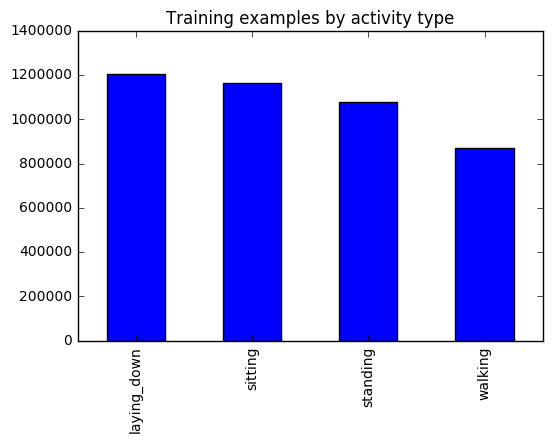

In [8]:

df_ac[5].value_counts().plot(kind='bar', title='Training examples by activity type')

plt.show()

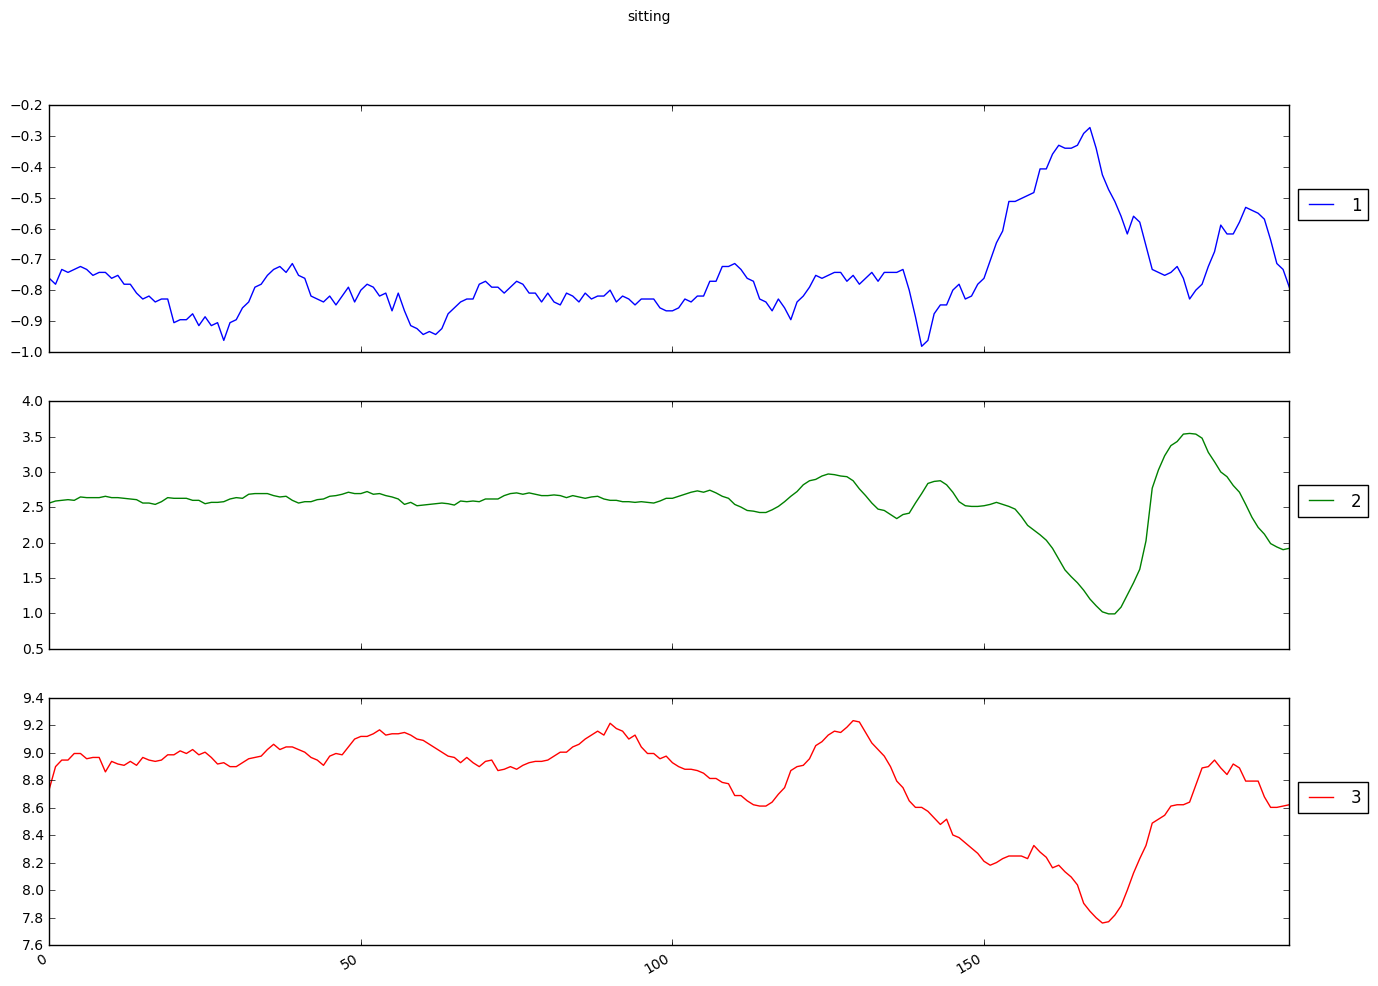

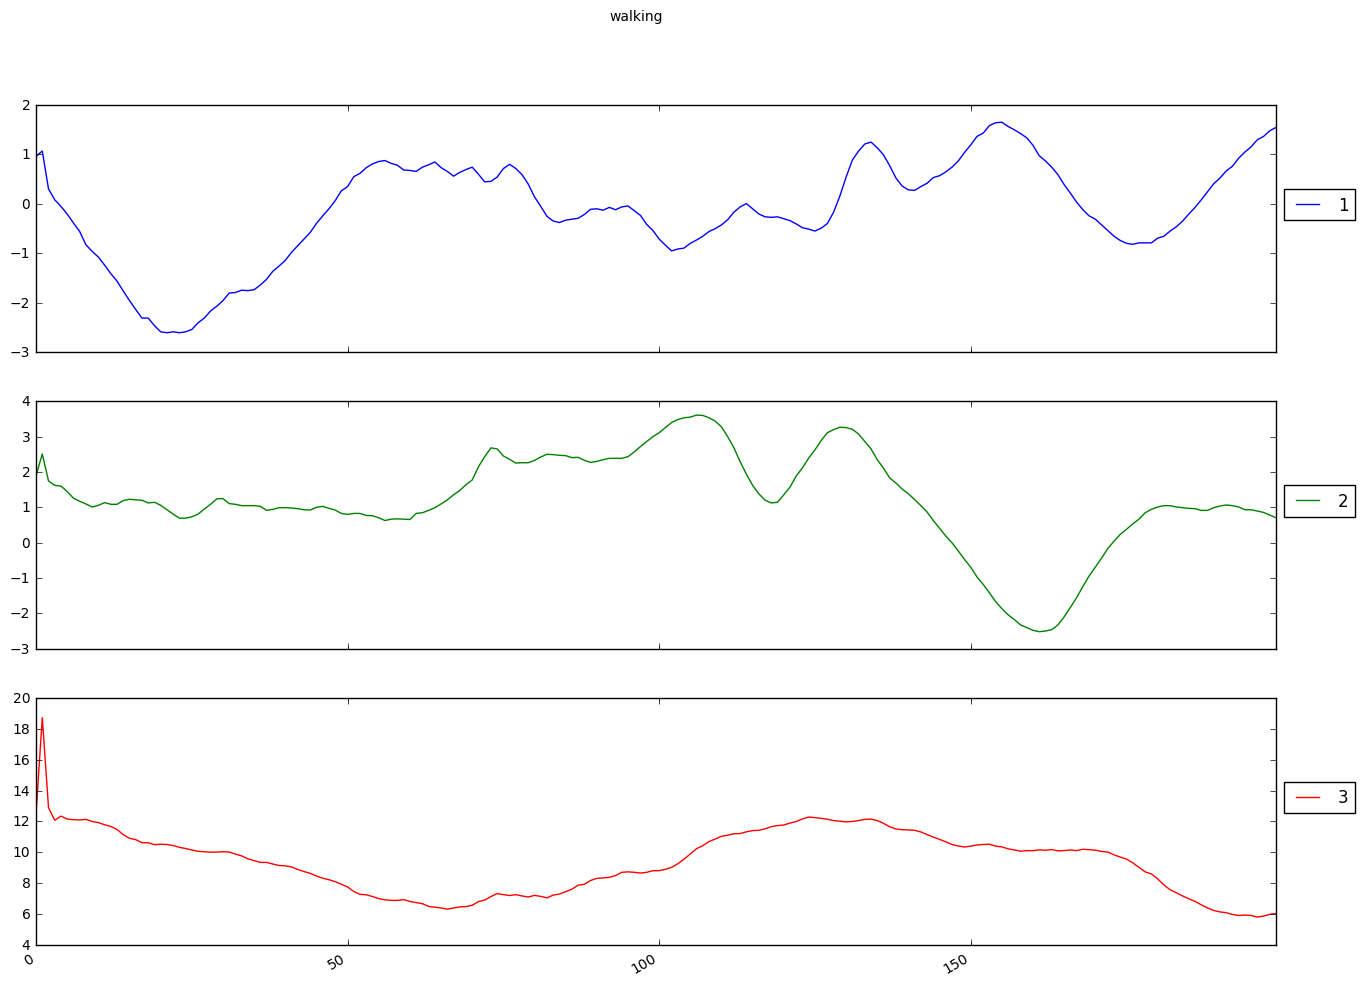

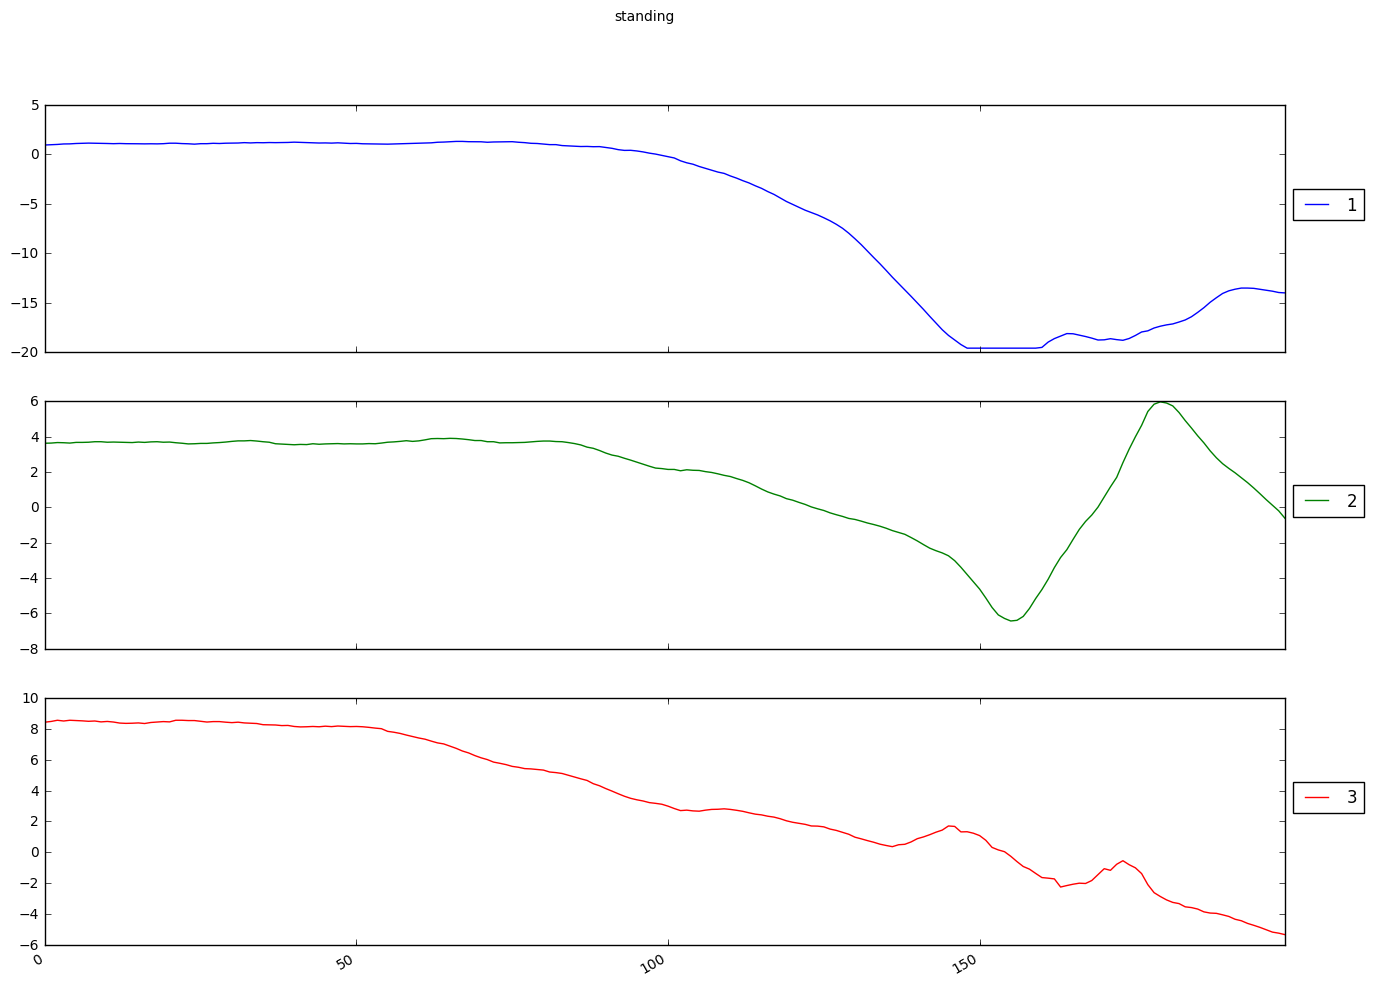

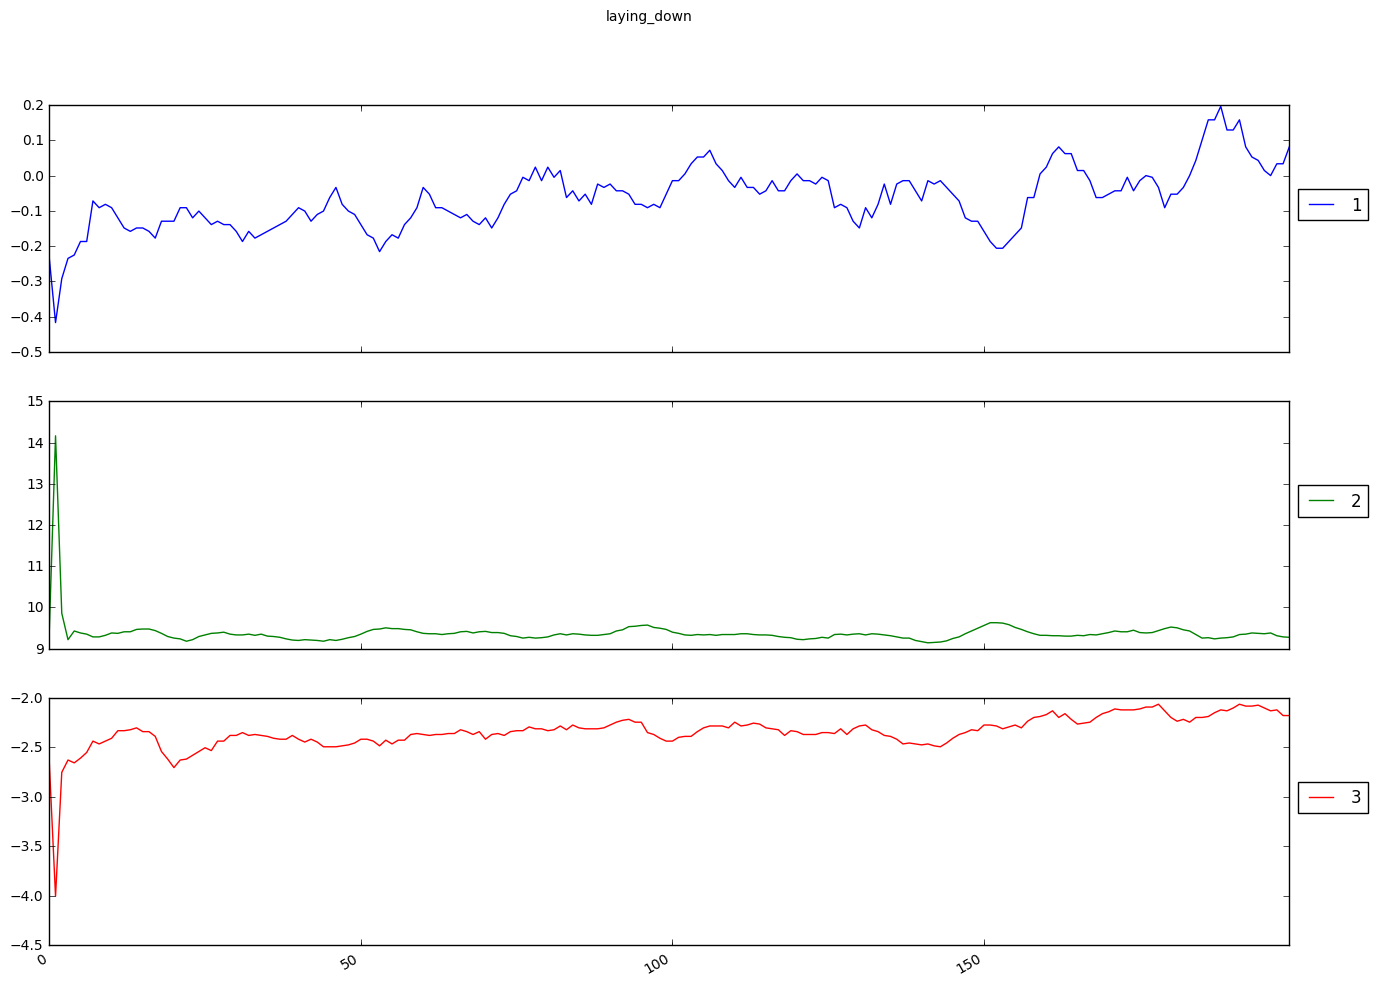

In [32]:
def plot_activity(activity, df):
    data = df[df[5] == activity][[1, 2, 3]][:200]
    axis = data.plot(subplots=True, figsize=(16, 12), 
                     title=activity)
    for ax in axis:
        ax.legend(loc='lower left', bbox_to_anchor=(1.0, 0.5))
plot_activity("sitting", df_ac_not_smooth)
plt.show()
plot_activity("walking", df_ac_not_smooth)
plt.show()
plot_activity("standing", df_ac_not_smooth)
plt.show()
plot_activity("laying_down", df_ac_not_smooth)
plt.show()

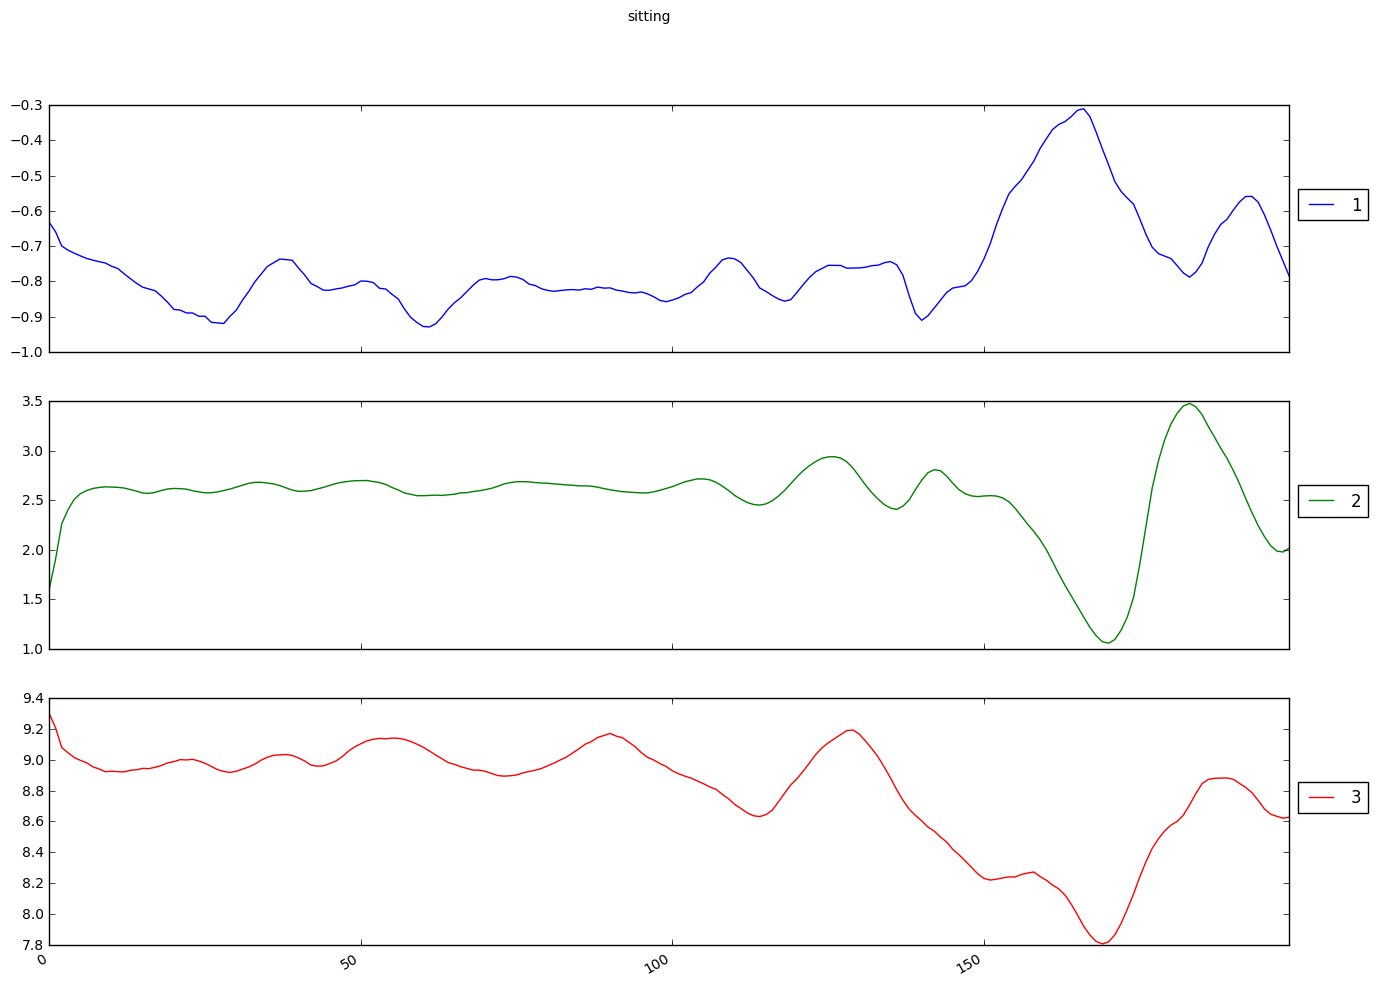

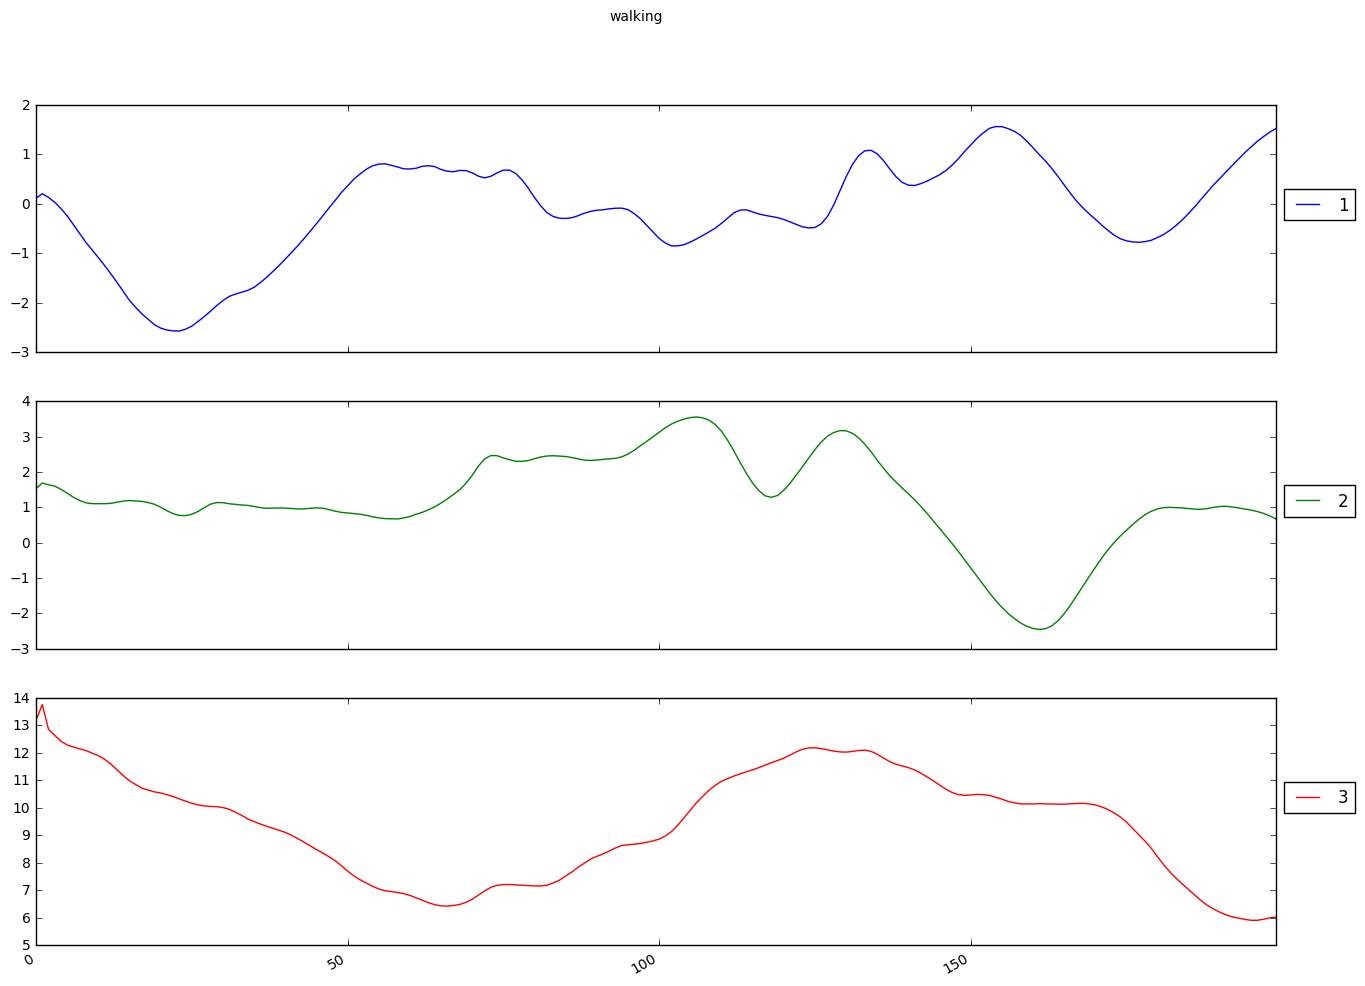

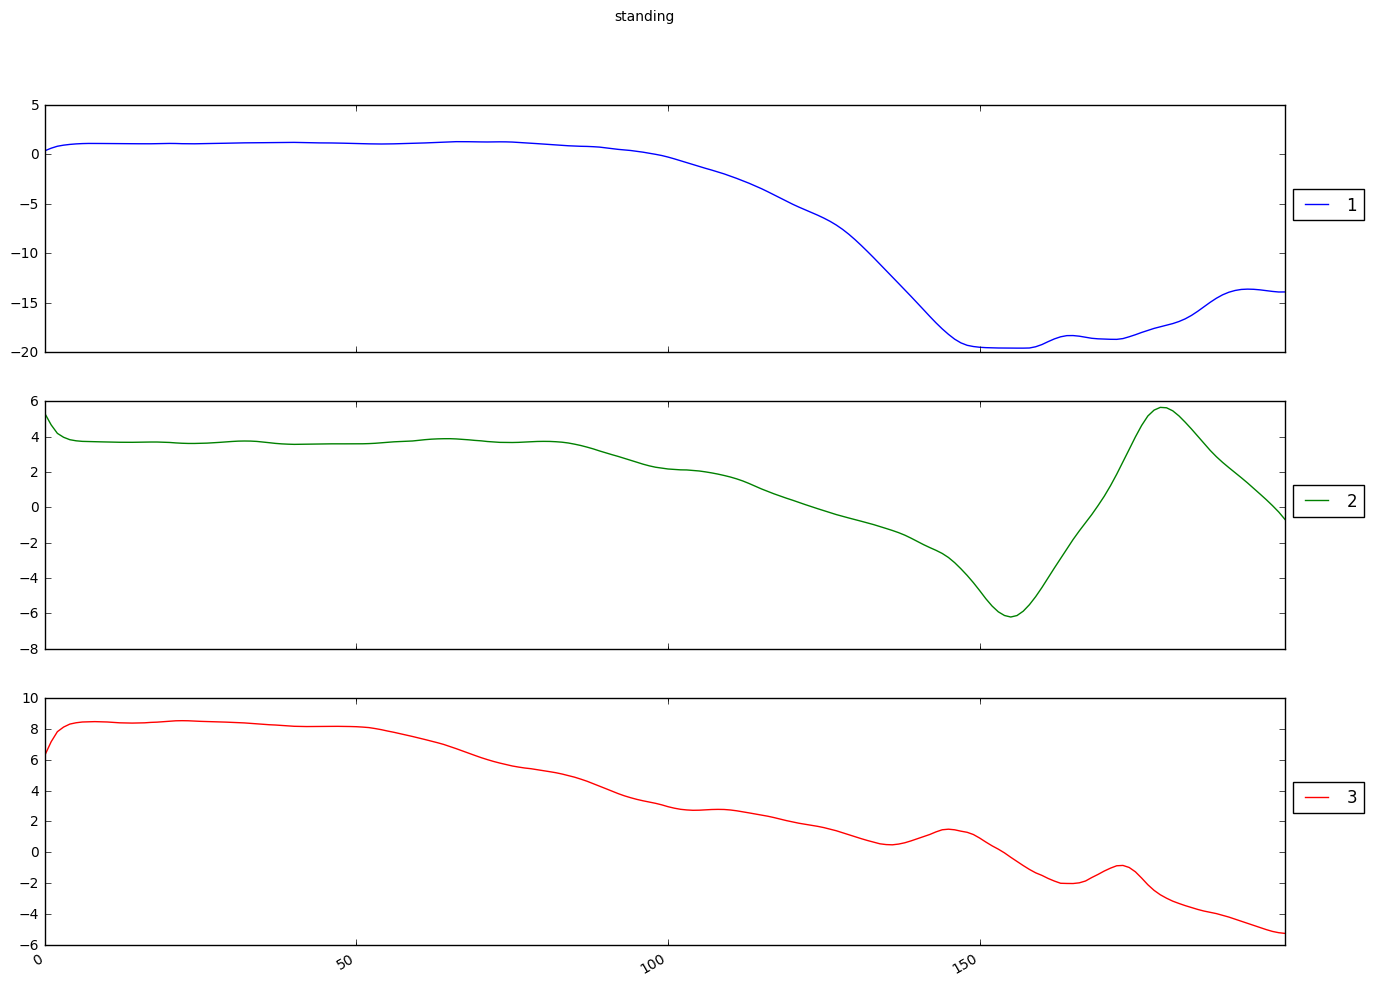

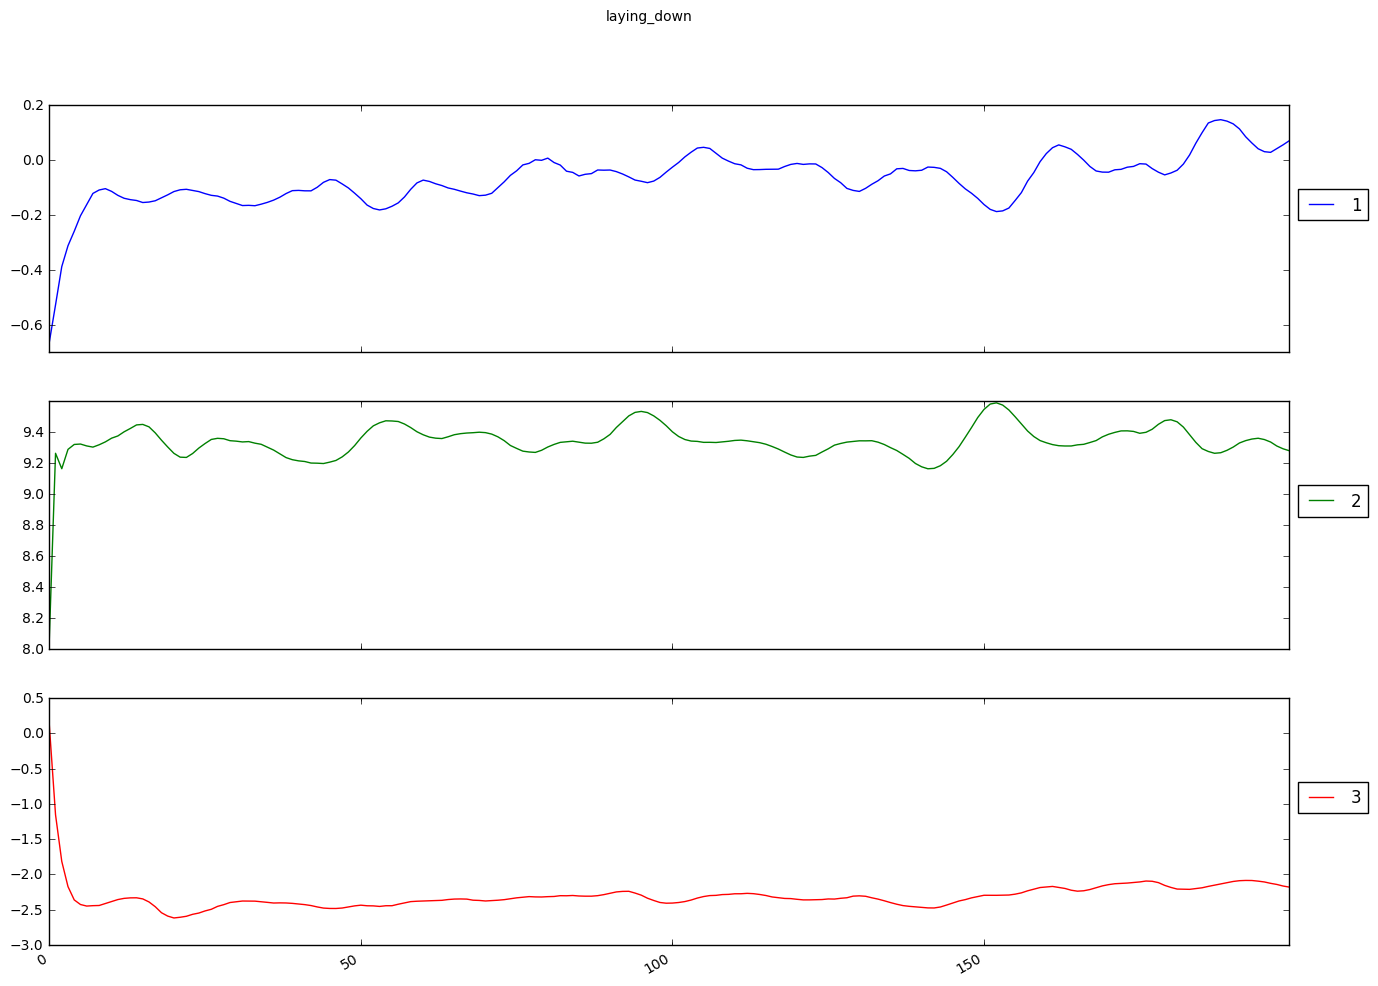

In [33]:
plot_activity("sitting", df_ac_smooth)
plt.show()
plot_activity("walking", df_ac_smooth)
plt.show()
plot_activity("standing", df_ac_smooth)
plt.show()
plot_activity("laying_down", df_ac_smooth)
plt.show()

In [9]:
N_TIME_STEPS = 2000
N_FEATURES = 3
step = 1000
segments = []
labels = []
for i in range(0, len(df_ac) - N_TIME_STEPS, step):
    xs = df_ac[1].values[i: i + N_TIME_STEPS]
    ys = df_ac[2].values[i: i + N_TIME_STEPS]
    zs = df_ac[3].values[i: i + N_TIME_STEPS]
    label = stats.mode(df_ac[5][i: i + N_TIME_STEPS])[0][0]
    segments.append([xs, ys, zs])
    labels.append(label)

d:\anaconda\lib\site-packages\scipy\stats\stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


In [10]:
print(np.array(segments).shape)
reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1, N_TIME_STEPS, N_FEATURES)
labels = np.asarray(pd.get_dummies(labels), dtype = np.float32)
print(reshaped_segments.shape)

(4319, 3, 2000)
(4319, 2000, 3)


In [11]:
labels[0]

array([0., 1., 0., 0.], dtype=float32)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
        reshaped_segments, labels, test_size=0.2, random_state=RANDOM_SEED)

In [13]:
N_CLASSES = 4
N_HIDDEN_UNITS = 64
def create_LSTM_model(inputs):
    W = {
        'hidden': tf.Variable(tf.random_normal([N_FEATURES, N_HIDDEN_UNITS])),
        'output': tf.Variable(tf.random_normal([N_HIDDEN_UNITS, N_CLASSES]))
    }
    biases = {
        'hidden': tf.Variable(tf.random_normal([N_HIDDEN_UNITS], mean=1.0)),
        'output': tf.Variable(tf.random_normal([N_CLASSES]))
    }
    
    X = tf.transpose(inputs, [1, 0, 2])
    X = tf.reshape(X, [-1, N_FEATURES])
    hidden = tf.nn.relu(tf.matmul(X, W['hidden']) + biases['hidden'])
    hidden = tf.split(hidden, N_TIME_STEPS, 0)

    # Stack 2 LSTM layers
    lstm_layers = [tf.contrib.rnn.BasicLSTMCell(N_HIDDEN_UNITS, forget_bias=1.0) for _ in range(2)]
    lstm_layers = tf.contrib.rnn.MultiRNNCell(lstm_layers)

    outputs, _ = tf.contrib.rnn.static_rnn(lstm_layers, hidden, dtype=tf.float32)

    # Get output for the last time step
    lstm_last_output = outputs[-1]

    return tf.matmul(lstm_last_output, W['output']) + biases['output']

In [14]:
tf.reset_default_graph()

X = tf.placeholder(tf.float32, [None, N_TIME_STEPS, N_FEATURES], name="input")
Y = tf.placeholder(tf.float32, [None, N_CLASSES])

In [15]:
pred_Y = create_LSTM_model(X)

pred_softmax = tf.nn.softmax(pred_Y, name="y_")

In [16]:
L2_LOSS = 0.0015

l2 = L2_LOSS * \
    sum(tf.nn.l2_loss(tf_var) for tf_var in tf.trainable_variables())

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = pred_Y, labels = Y)) + l2

In [17]:
LEARNING_RATE = 0.0025

optimizer = tf.train.AdamOptimizer(learning_rate=LEARNING_RATE).minimize(loss)

correct_pred = tf.equal(tf.argmax(pred_softmax, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, dtype=tf.float32))

In [18]:
N_EPOCHS = 50
BATCH_SIZE = 64
saver = tf.train.Saver()

history = dict(train_loss=[], 
                     train_acc=[], 
                     test_loss=[], 
                     test_acc=[])

sess=tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

train_count = len(X_train)

for i in range(1, N_EPOCHS + 1):
    for start, end in zip(range(0, train_count, BATCH_SIZE),
                          range(BATCH_SIZE, train_count + 1,BATCH_SIZE)):
        sess.run(optimizer, feed_dict={X: X_train[start:end],
                                       Y: y_train[start:end]})

    _, acc_train, loss_train = sess.run([pred_softmax, accuracy, loss], feed_dict={
                                            X: X_train, Y: y_train})

    _, acc_test, loss_test = sess.run([pred_softmax, accuracy, loss], feed_dict={
                                            X: X_test, Y: y_test})

    history['train_loss'].append(loss_train)
    history['train_acc'].append(acc_train)
    history['test_loss'].append(loss_test)
    history['test_acc'].append(acc_test)

    #if i != 1 and i % 10 != 0:
        #continue

    print('epoch: ' + str(i) + ' test accuracy :' + str(acc_test) + ' loss :' +str(loss_test))
    
predictions, acc_final, loss_final = sess.run([pred_softmax, accuracy, loss], feed_dict={X: X_test, Y: y_test})

print()
print('final results : accuracy :' +str(acc_final) + ' loss: ' +str(loss_final))

epoch: 1 test accuracy :0.6331019 loss :1.5975192
epoch: 2 test accuracy :0.6678241 loss :1.4275436
epoch: 3 test accuracy :0.724537 loss :1.3111773
epoch: 4 test accuracy :0.6423611 loss :1.381442
epoch: 5 test accuracy :0.5011574 loss :1.737073
epoch: 6 test accuracy :0.6666667 loss :1.2781944
epoch: 7 test accuracy :0.6793981 loss :1.2726878
epoch: 8 test accuracy :0.6886574 loss :1.224932
epoch: 9 test accuracy :0.7268519 loss :1.1374267
epoch: 10 test accuracy :0.7685185 loss :1.0788255
epoch: 11 test accuracy :0.7766204 loss :1.0608867
epoch: 12 test accuracy :0.7303241 loss :1.0693127
epoch: 13 test accuracy :0.7106481 loss :1.1053203
epoch: 14 test accuracy :0.7233796 loss :1.0542084
epoch: 15 test accuracy :0.7708333 loss :0.9700501
epoch: 16 test accuracy :0.7581019 loss :0.96694237
epoch: 17 test accuracy :0.7696759 loss :0.9377805
epoch: 18 test accuracy :0.7789352 loss :0.90010583
epoch: 19 test accuracy :0.7708333 loss :0.90429235
epoch: 20 test accuracy :0.7766204 loss :

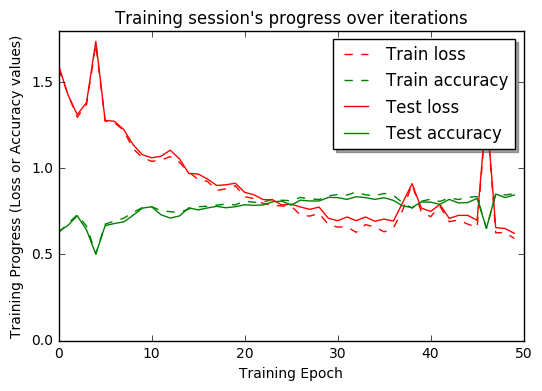

In [20]:
plt.plot(np.array(history['train_loss']), "r--", label="Train loss")
plt.plot(np.array(history['train_acc']), "g--", label="Train accuracy")
plt.plot(np.array(history['test_loss']), "r-", label="Test loss")
plt.plot(np.array(history['test_acc']), "g-", label="Test accuracy")
plt.title("Training session's progress over iterations")
plt.legend(loc='upper right', shadow=True)
plt.ylabel('Training Progress (Loss or Accuracy values)')
plt.xlabel('Training Epoch')
plt.ylim(0)
plt.show()

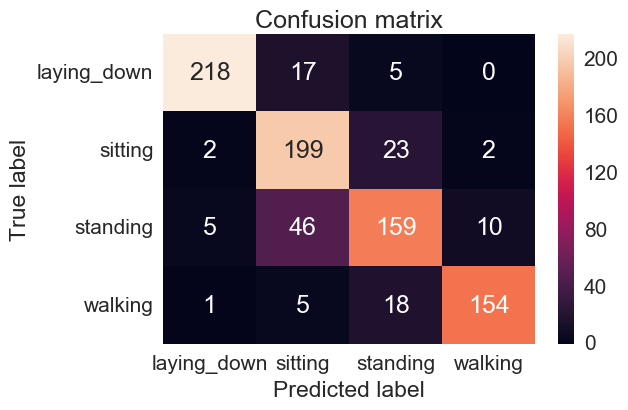

In [29]:
import seaborn as sns
from pylab import rcParams
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 4, 4
LABELS = ['laying_down', 'sitting', 'standing', 'walking']
max_test = np.argmax(y_test, axis=1)
max_predictions = np.argmax(predictions, axis=1)
confusion_matrix = metrics.confusion_matrix(max_test, max_predictions)
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show();